# Analysis of Research Paper Bibliography

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
icloud_dir = "/Users/billtubbs/Library/Mobile Documents/com~apple~CloudDocs/Documents"
project_dir = 'MyDocuments/Projects/SAG Mill Dynamic Optimization'
sub_dir = 'Literature review/Zotero data'
os.listdir(os.path.join(icloud_dir, project_dir, sub_dir))

['Zotero Exported Items.csv']

In [4]:
filename = 'Zotero Exported Items.csv'
filepath = os.path.join(icloud_dir, project_dir, sub_dir, filename)
df = pd.read_csv(filepath)

In [5]:
df.columns

Index(['Key', 'Item Type', 'Publication Year', 'Author', 'Title',
       'Publication Title', 'ISBN', 'ISSN', 'DOI', 'Url', 'Abstract Note',
       'Date', 'Date Added', 'Date Modified', 'Access Date', 'Pages',
       'Num Pages', 'Issue', 'Volume', 'Number Of Volumes',
       'Journal Abbreviation', 'Short Title', 'Series', 'Series Number',
       'Series Text', 'Series Title', 'Publisher', 'Place', 'Language',
       'Rights', 'Type', 'Archive', 'Archive Location', 'Library Catalog',
       'Call Number', 'Extra', 'Notes', 'File Attachments', 'Link Attachments',
       'Manual Tags', 'Automatic Tags', 'Editor', 'Series Editor',
       'Translator', 'Contributor', 'Attorney Agent', 'Book Author',
       'Cast Member', 'Commenter', 'Composer', 'Cosponsor', 'Counsel',
       'Interviewer', 'Producer', 'Recipient', 'Reviewed Author',
       'Scriptwriter', 'Words By', 'Guest', 'Number', 'Edition',
       'Running Time', 'Scale', 'Medium', 'Artwork Size', 'Filing Date',
       'Applicatio

In [6]:
# Missing value counts / %
(100 * df.isna().sum() / df.shape[0]).sort_values().round(0).head(20)

Key                   0.0
Item Type             0.0
Title                 0.0
Date Added            0.0
Date Modified         0.0
Author                2.0
File Attachments      4.0
Publication Year     12.0
Date                 12.0
Abstract Note        19.0
Manual Tags          24.0
Publication Title    26.0
Pages                29.0
Url                  41.0
Volume               43.0
DOI                  48.0
Language             49.0
Library Catalog      51.0
Access Date          61.0
Issue                65.0
dtype: float64

In [7]:
df['Publication Title'].value_counts()

Minerals Engineering                                                    31
International Journal of Mineral Processing                              9
Powder Technology                                                        9
Journal of Process Control                                               8
IFAC-PapersOnLine                                                        7
Advanced Control and Supervision of Mineral Processing Plants            5
Modeling and Simulation of Mineral Processing Systems                    3
arXiv:1805.12114 [cs, stat]                                              2
KONA Powder and Particle Journal                                         2
2016 IEEE International Conference on Robotics and Automation (ICRA)     2
IFAC Proceedings Volumes                                                 2
Industrial & Engineering Chemistry Research                              2
Chemical Engineering Science                                             2
ISA Transactions         

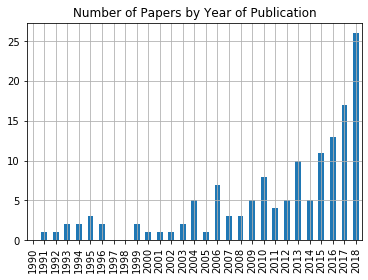

In [8]:
papers_by_year = pd.Series(df['Publication Year'].value_counts(), index=range(1990, 2019))
papers_by_year.plot.bar()
plt.title('Number of Papers by Year of Publication')
plt.grid()

In [9]:
type_counts = {}
tag_counts = {}

type_counts = {}
for tag_str in df['Manual Tags']:
    object_type = type(tag_str)
    type_counts[object_type] = type_counts.get(object_type, 0) + 1
    if isinstance(tag_str, str):
        tags = tag_str.split('; ')
        for tag in tags:
            tag_counts[tag] = tag_counts.get(tag, 0) + 1
tag_counts = pd.Series(tag_counts)
type_counts

{str: 129, float: 41}

In [10]:
tag_counts.head()

Comminution                   31
Crushing                       8
Distributed control system     1
Energy consumption            11
Expert system                  6
dtype: int64

In [11]:
priority_tags = tag_counts.index.str.startswith('Priority')
status_tags = tag_counts.index.str.startswith('Status')
tag_counts[priority_tags]

Priority 3    13
Priority 1    21
Priority 2    19
dtype: int64

In [12]:
tag_counts[status_tags]

Status - to read            24
Status - Finished           14
Status - reading in full    10
Status - Partly read        18
dtype: int64

In [13]:
category_tags = tag_counts[~(priority_tags | status_tags)]
category_tags

Comminution                    31
Crushing                        8
Distributed control system      1
Energy consumption             11
Expert system                   6
                               ..
Ore grade sensing               1
Locally linear embedding        1
Dynamic data reconciliation     1
Moving horizon estimation       1
Loop tuning                     1
Length: 167, dtype: int64

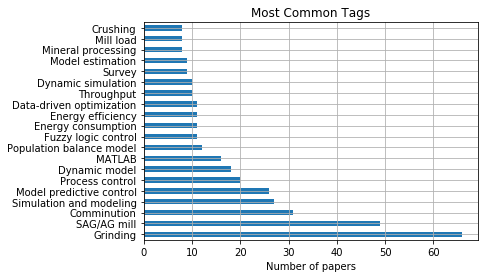

In [14]:
category_tags.sort_values(ascending=False).head(20).plot.barh()
plt.grid()
plt.title('Most Common Tags')
plt.xlabel('Number of papers')
plt.show()

In [15]:
# Produce a matrix of papers and tags
rows = []
for i, row in df[['Title', 'Short Title', 'Manual Tags']].iterrows():
    tag_str = row['Manual Tags']
    if isinstance(tag_str, str):
        tags = tag_str.split('; ')
    else:
        tags = []
    title = row['Short Title']
    if not isinstance(title, str):
        title = row['Title'][0:25]
    tags_found = pd.Series({k: True for k in tags}, 
                           name=title)
    rows.append(tags_found)

tags_by_paper = pd.DataFrame(rows)
tags_by_paper = tags_by_paper.fillna(False).sort_index(axis=1)
tags_by_paper.shape

(170, 174)

In [16]:
tags_by_paper.replace({True: 1, False: 0}).to_csv('tags-by-paper.csv')

In [17]:
tags_by_paper.columns

Index(['AG/SAG mill', 'APMonitor', 'ARX model', 'Adaptive control',
       'Advanced process control', 'Advanced regulatory control',
       'Analytical solution', 'Anomaly detection', 'Appearance model',
       'Approximate dynamic programming',
       ...
       'System identification', 'Throughput', 'Tower mill', 'Training',
       'Uncertainty', 'Unmeasured variables', 'Unsupervised learning',
       'Variable speed drives', 'Visual sensors', 'Water balance'],
      dtype='object', length=174)

In [18]:
tags_by_paper.loc[tags_by_paper['Expert system']].index.tolist()

['Current Trends in SAG and',
 'Model Predictive Control ',
 'Model Predictive Control ',
 'A plant-scale validated M',
 'SAG Mill Optimization usi',
 'Optimisation Of The Promi']